# BlueBerry Winery - Wine Quality Data Analytics

Develop models to determine the quality of the wines produced based on their chemical composition

# Load libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline #tried to use this to supress text output before plots - did not work. TODO: try ipyml instead.

%matplotlib ipympl  # enables using the interactive features of matplotlib in Jupyter

%config InlineBackend.figure_format = 'retina' # Make graphs not blurry 

UsageError: unrecognized arguments: # enables using the interactive features of matplotlib in Jupyter


In [2]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
#display(red_wine)

# Data Wrangling

## Assess data

### 1. print the first 10 and the last 10 records (use head() and tail() methods)

In [3]:
display(red_wine.head(10))
display(red_wine.tail(10))

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1589            6.6             0.725         0.20             7.8      0.073   
1590            6.3             0.550         0.15             1.8      0.077   
1591            5.4             0.740         0.09             1.7      0.089   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1589                 29.0                  79.0  0.99770  3.29       0.54   
1590                 26.0                  35.0  0.99314  3.32       0.82   
1591                 16.0                  26.0  0.99402  3.67       0.56   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1589      9.2        5  
1590     11.6        6  
1591     11.6        6  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

### 2. use info() and shape methods

In [4]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
red_wine.shape

(1599, 12)

In [6]:
white_wine.shape

(4898, 12)

### 3. observe if there are missing values (use isna(), isnull())


In [7]:
#[https://pandas.pydata.org/docs/reference/api/pandas.isnull.html])
display("Empty fields:",red_wine.isnull().sum(), red_wine.isna().sum())

'Empty fields:'

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 4. check for Descriptive Statistics for both red and white wine datasets (use describe() method)

In [8]:
display('Red wine', red_wine.describe())
display('White wine', white_wine.describe())

'Red wine'

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

'White wine'

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

## Transform data

### 1. Group 'Quality' values into 3 category labels: low, medium and high 

In [9]:
# create a new column "quality_label" to store the new labels. 
# use a lambda (single-use/ shorthand/ one-line/ anonymous) function to define the value ranges for each label 
# and apply() the labels accordingly to the whole column. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# cast column to Categorical (pandas) data type, ordered low to high
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'], ordered=True)

In [10]:
display('Red', red_wine.quality_label.value_counts()) # check how many wines are in each new category
display(red_wine.quality_label.dtype) # line to double-check if dtype is Categorical

'Red'

medium    837
low       744
high       18
Name: quality_label, dtype: int64

CategoricalDtype(categories=['low', 'medium', 'high'], ordered=True)

In [11]:
#Do the same with the white wine.
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'], ordered=True)

#display('White', white_wine.quality_label.value_counts()) # check how many wines are in each new category

### 2. Create a third dataset combining red and white wines together.

In [12]:
# first, mark red as red and white as white, so as not to lose this attribute
red_wine['color'] = 'red'
white_wine['color'] = 'white'
# check the values have applied properly
display(red_wine.head(10))
display(white_wine.head(10))

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality quality_label color  
0      9.4        5           low   red  
1      9.8        5           low   red  
2      9.8        5           low   red  
3      9.8        6        medium   red  
4      9.4        5           low   red  
5      9.4        5           low   red  
6      9.4        5           low   red  
7     10.0        7        medium   red  
8      9.5        7        medium   red  
9     10.5        5           low   red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality quality_label  color  
0      8.8        6        medium  white  
1      9.5        6        medium  white  
2     10.1        6        medium  white  
3      9.9        6        medium  white  
4      9.9        6        medium  white  
5     10.1        6        medium  white  
6      9.6        6        medium  white  
7      8.8        6        medium  white  
8      9.5        6        medium  white  
9     11.0        6        medium  white

In [13]:
# join datasets as 'wines'. Note: concat() only takes an iterable as input, so you need the extra [..,..] to make it be a list
wines = pd.concat([red_wine, white_wine])

# make 'color' Categorical
wines['color'] = pd.Categorical(wines['color'],
categories=['red', 'white'])
#display(wines)

# write to file
wines.to_csv('wines_combined.csv')

### 3. EXTRA: Remove outliers

In [64]:
# Q1 = wines.quantile(0.25, numeric_only=True)
# Q3 = wines.quantile(0.75, numeric_only=True)
# IQR = Q3 - Q1
# wines2 = ...  ### Could not make this method work with categorical data

/tmp/ipykernel_7262/167553555.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  wines2 = wines.select_dtypes(include=['int64', 'floating'])[~((wines < (Q1-1.5 * IQR)) |(wines > (Q3 + 1.5 * IQR))).any(axis=1)]


TypeError: Unordered Categoricals can only compare equality or not

In [75]:
# TODO: fix this (append rows to df, make sure)
for col in wines.select_dtypes('float'): 
    outliers = wines[wines[col] > wines[col].mean() + 3 * wines[col].std()]
display(outliers)

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

# Exploratory Analysis 1

## Compare Descriptive Statistics

In [14]:
# table combining red and white stats, but only for residual sugar, total sulfur dioxide, sulphates, alcohol, volatile acidity, quality
pd.concat([red_wine.describe().loc[:, ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']], 
           white_wine.describe().loc[:, ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']]], 
           axis=1, keys=["Red Wines Stats", "White Wines Stats"])

### QUESTION - how can I apply the same slice to both frames in one go?

Red Wines Stats                                                 \
       residual sugar total sulfur dioxide    sulphates      alcohol   
count     1599.000000          1599.000000  1599.000000  1599.000000   
mean         2.538806            46.467792     0.658149    10.422983   
std          1.409928            32.895324     0.169507     1.065668   
min          0.900000             6.000000     0.330000     8.400000   
25%          1.900000            22.000000     0.550000     9.500000   
50%          2.200000            38.000000     0.620000    10.200000   
75%          2.600000            62.000000     0.730000    11.100000   
max         15.500000           289.000000     2.000000    14.900000   

                                    White Wines Stats                       \
      volatile acidity      quality    residual sugar total sulfur dioxide   
count      1599.000000  1599.000000       4898.000000          4898.000000   
mean          0.527821     5.636023          6.391415           138.360657   
std           0.179060     0.807569          5.072058            42.498065   
min           0.120000     3.000000          0.600000             9.000000   
25%           0.390000     5.000000          1.700000           108.000000   
50%           0.520000     6.000000          5.200000           134.000000   
75%           0.640000     6.000000          9.900000           167.000000   
max           1.580000     8.000000         65.800000           440.000000   

                                                               
         sulphates      alcohol volatile acidity      quality  
count  4898.000000  4898.000000      4898.000000  4898.000000  
mean      0.489847    10.514267         0.278241     5.877909  
std       0.114126     1.230621         0.100795     0.885639  
min       0.220000     8.000000         0.080000     3.000000  
25%       0.410000     9.500000         0.210000     5.000000  
50%       0.470000    10.400000         0.260000     6.000000  
75%       0.550000    11.400000         0.320000     6.000000  
max       1.080000    14.200000         1.100000     9.000000

More observations:
- white wines have higher residual sugar and sulfur dioxide on average, but the dataset is also more spread out for these values, espcially for sugar

## Plotting

### 1. Pie chart: Quantity of red and white wines

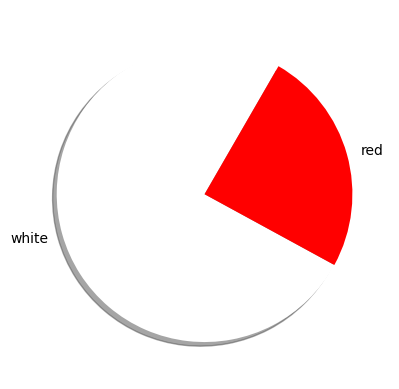

In [15]:
# had touble doing this directly from the df so i extracted the data first
color_count = wines['color'].value_counts()
#display(color_count, type(color_count))
#display(color_count.keys())

plt.pie(color_count, labels=color_count.keys(), colors=color_count.keys(), shadow=True, startangle=60);
# Question: proper way to make pyplot pie chart from pandas series?

## Question: how to get the count values directly from the df?

### 2. Histplot: Quality Label by Wine Color

Text(0.5, 0.98, 'Wine Quality by Color')

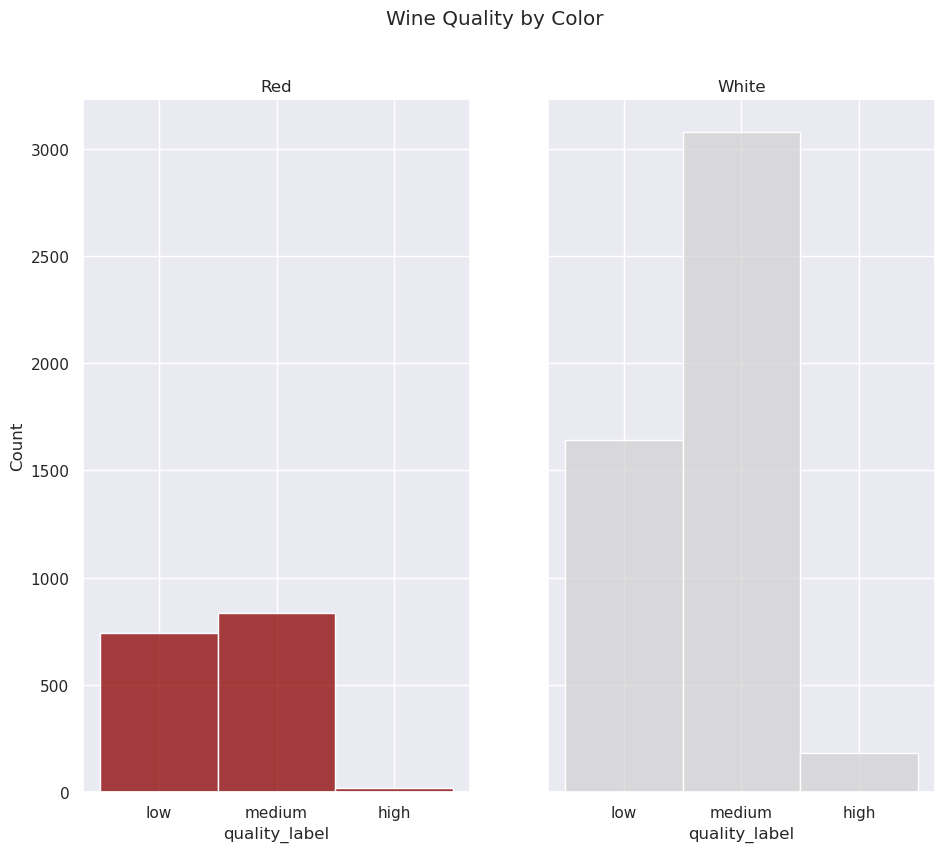

In [35]:
#Use seaborn histplot: https://seaborn.pydata.org/generated/seaborn.histplot.html
#Make sure that both plots have the same order in the x-axis.
#Change colors and titles.

#sns.histplot(data=(red_wine.quality_label, white_wine.quality_label)) ## ...etc. failed

## matpoltlib version:
# # create axes objects where each object corresponds to a single plot
# fig, axs = plt.subplots(1, 2, sharey="row") # sharey = "row" makes the y-axis the same.

# # create plots for each axes object
# axs[0].hist(red_wine.quality_label, color='red')
# axs[0].set_title("Red")

# axs[1].hist(white_wine.quality_label, color='lightgray')
# axs[1].set_title("White")
        
# plt.show()

## seaborn version:
fig, axes=plt.subplots(1,2,sharey="row") 
sns.histplot(ax=axes[0], data=red_wine.quality_label,color='darkred')
axes[0].set_title('Red')
sns.histplot(ax=axes[1],data=white_wine.quality_label,color='lightgray')
axes[1].set_title('White')
fig.suptitle('Wine Quality by Color')


### 3.1. Boxplot: Alcohol Content and pH by Quality Label

compare the quality with some other features. for some features it makes sense to distinguish between white and red wines, for some others we can simply explore them together. try reproducing the following box plot:

Text(0.5, 0.98, 'Wine pH and Alcohol % by Quality Class')

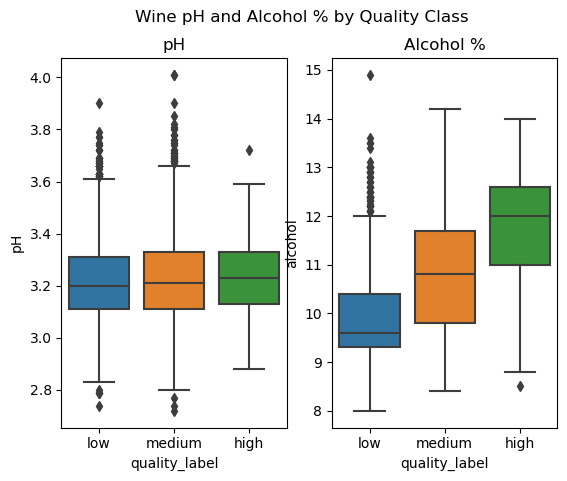

In [17]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

fig, axes=plt.subplots(1,2)

sns.boxplot(ax=axes[0], data=wines, x=wines.quality_label, y=wines.pH)
axes[0].set_title('pH')

sns.boxplot(ax=axes[1],data=wines, x=wines.quality_label, y=wines.alcohol)
axes[1].set_title('Alcohol %')

fig.suptitle('Wine pH and Alcohol % by Quality Class')


### 3.2. Pairplot: All numerical data, color-coded by quality

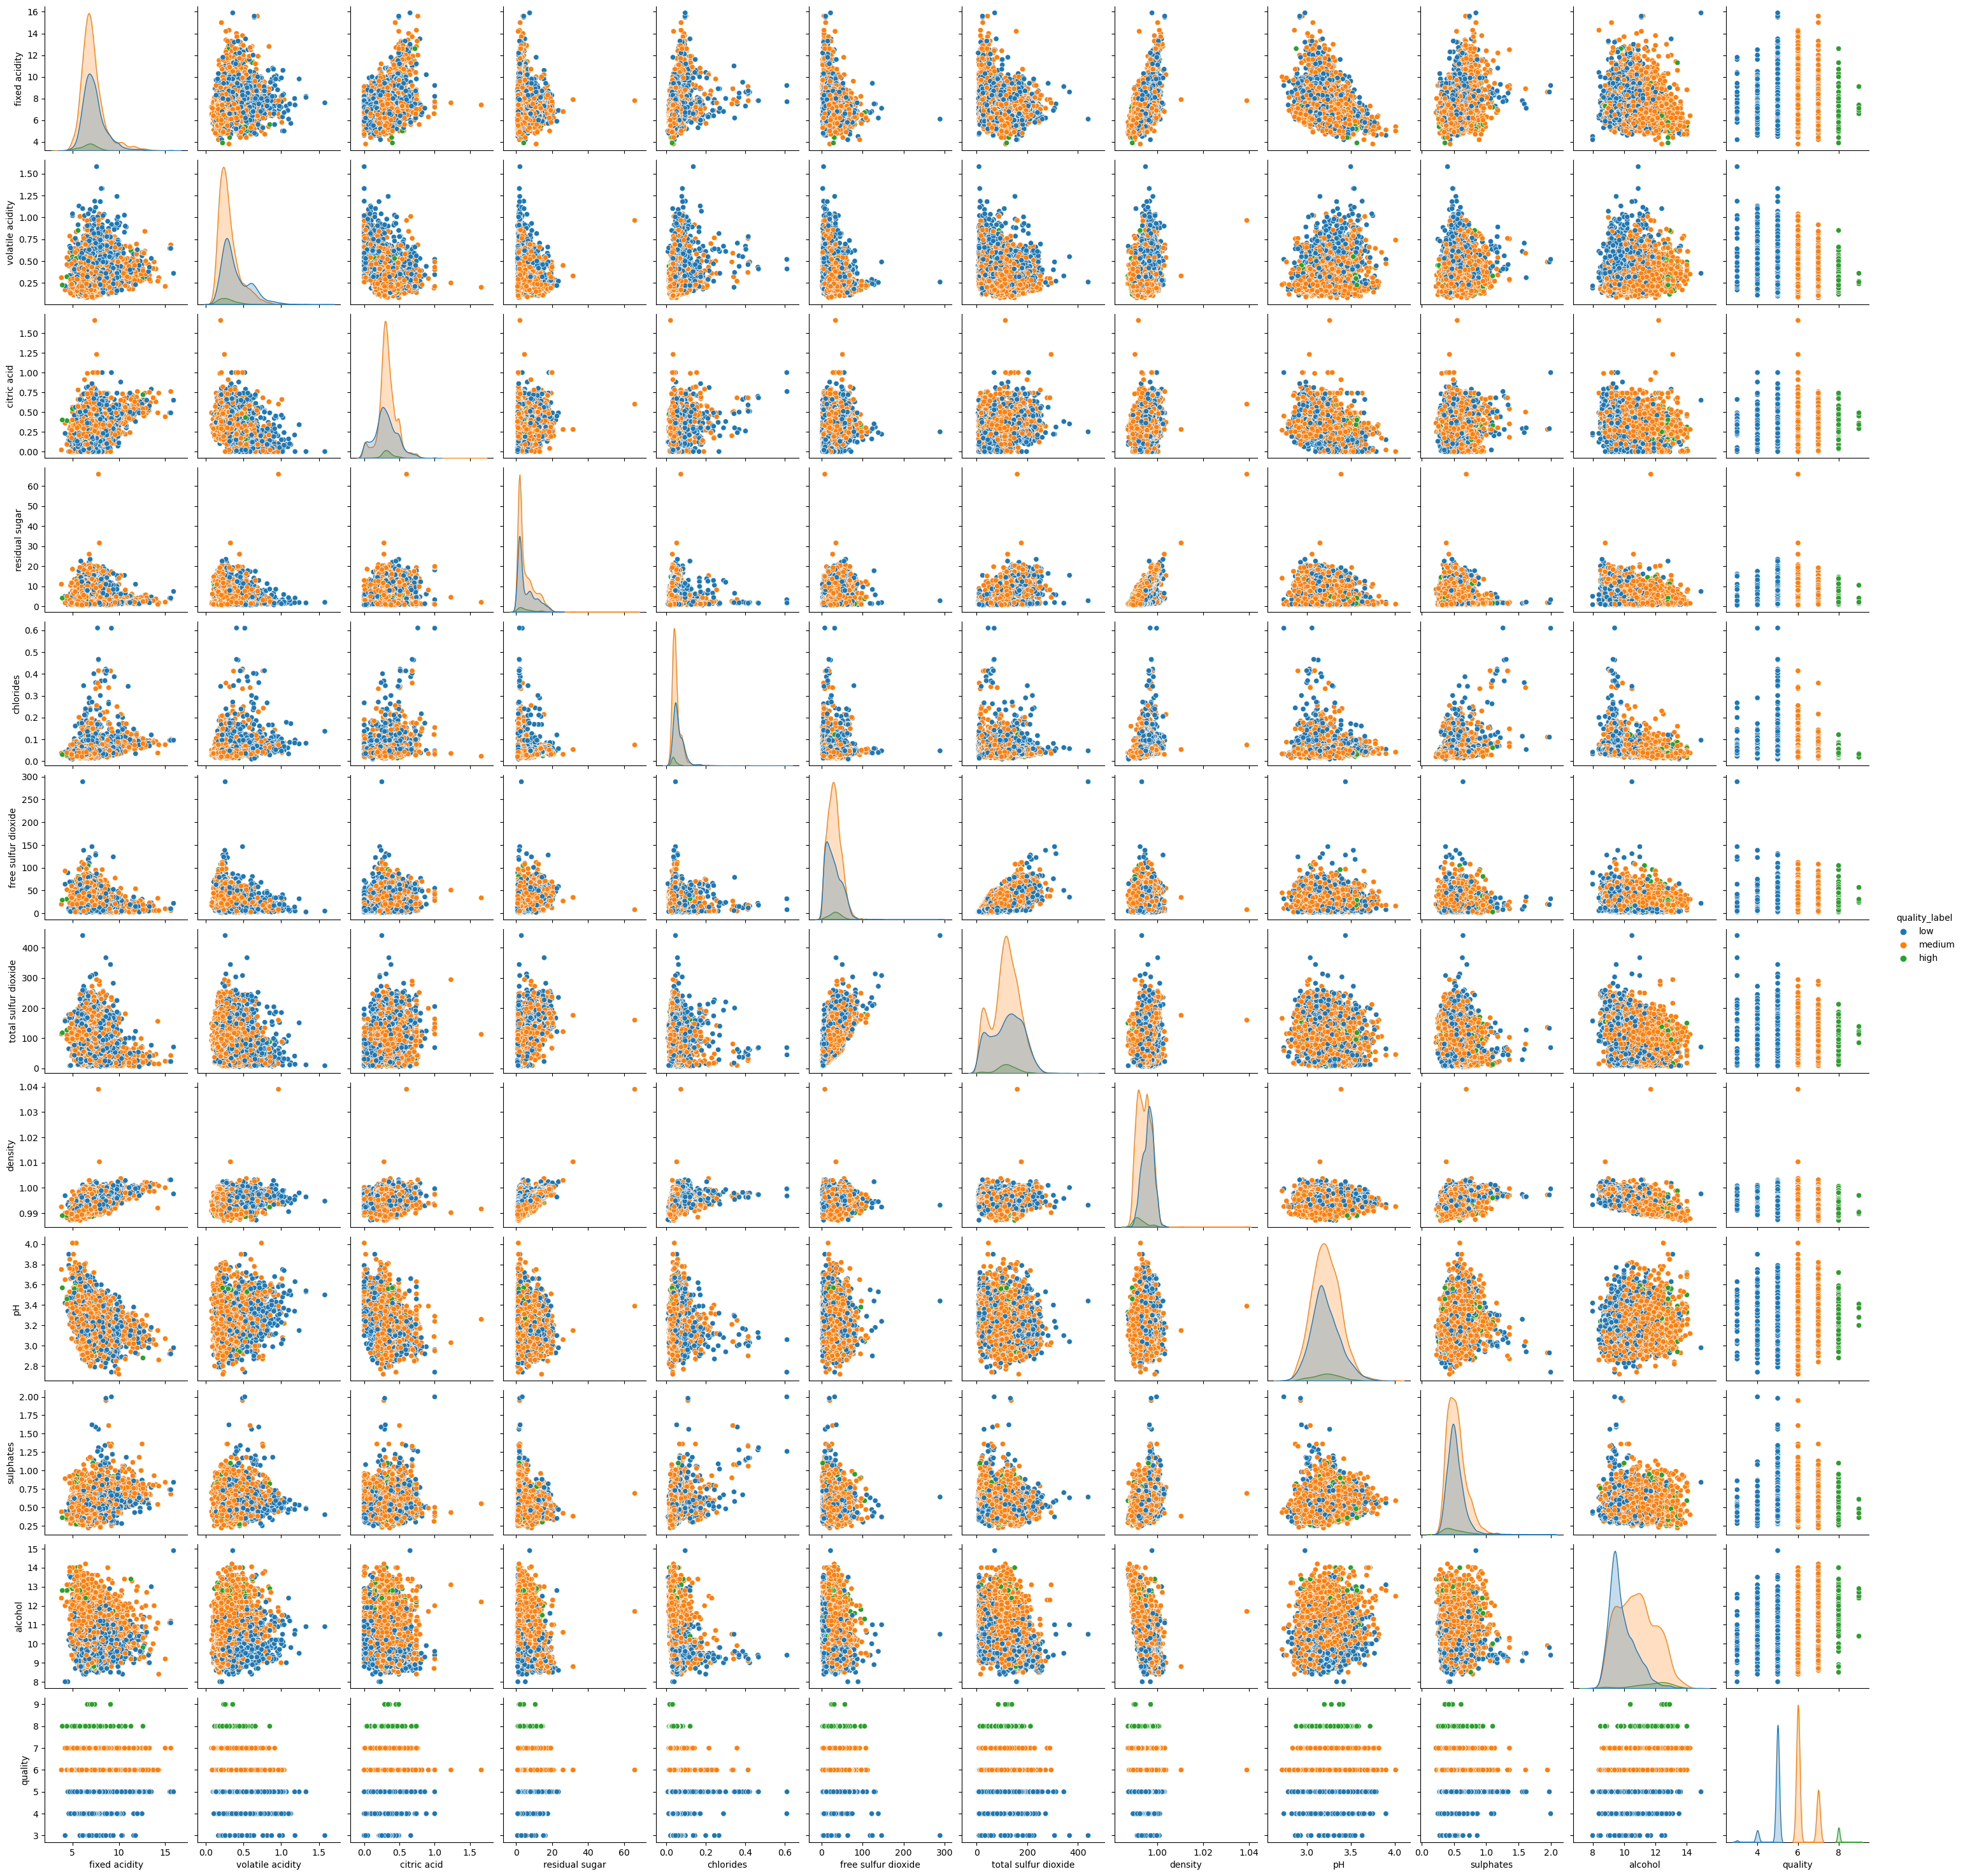

In [18]:
sns.pairplot(wines, hue="quality_label")

#### Pairplot Observations
There are a lot of datapoints for the size of the graph points, meaning the colours indicating quality are not all visible. 
Therefore, apparent colour trends on these graphs may be more influenced by the number of datapoints and the order of plotting than by the data. 
- Next (3.2) I will individaully further investigate some of the plots which appear to show quality trends and see if a larger graph size reveals whether they do. For example:
    * sulfur dioxide X alcohol, 
    * chlorides X alcohol, 
    * fixed acidity X density.

However, general correlations between some varibles (not taking quality into account) are visible, eg:
Fixed acidity:
- Positive correlations: Chlorides, Sulphates
- Negative correlations: pH 

The histograms are the only part that show us clearly the relations between the (single) variables and quality. Higher quality wines have:
- Noticeably lower: Chlorides, density, sulphites
- Noticeably higher: Alcohol

It is also clear that there are some outliers in the data for residual sugar, citric acid, and density, and one (?) in sulfur dioxide. We might need to remove these to see general trends better.

### 3.2.1 Pairplot refined

/home/sian/anaconda3/envs/stats_env/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


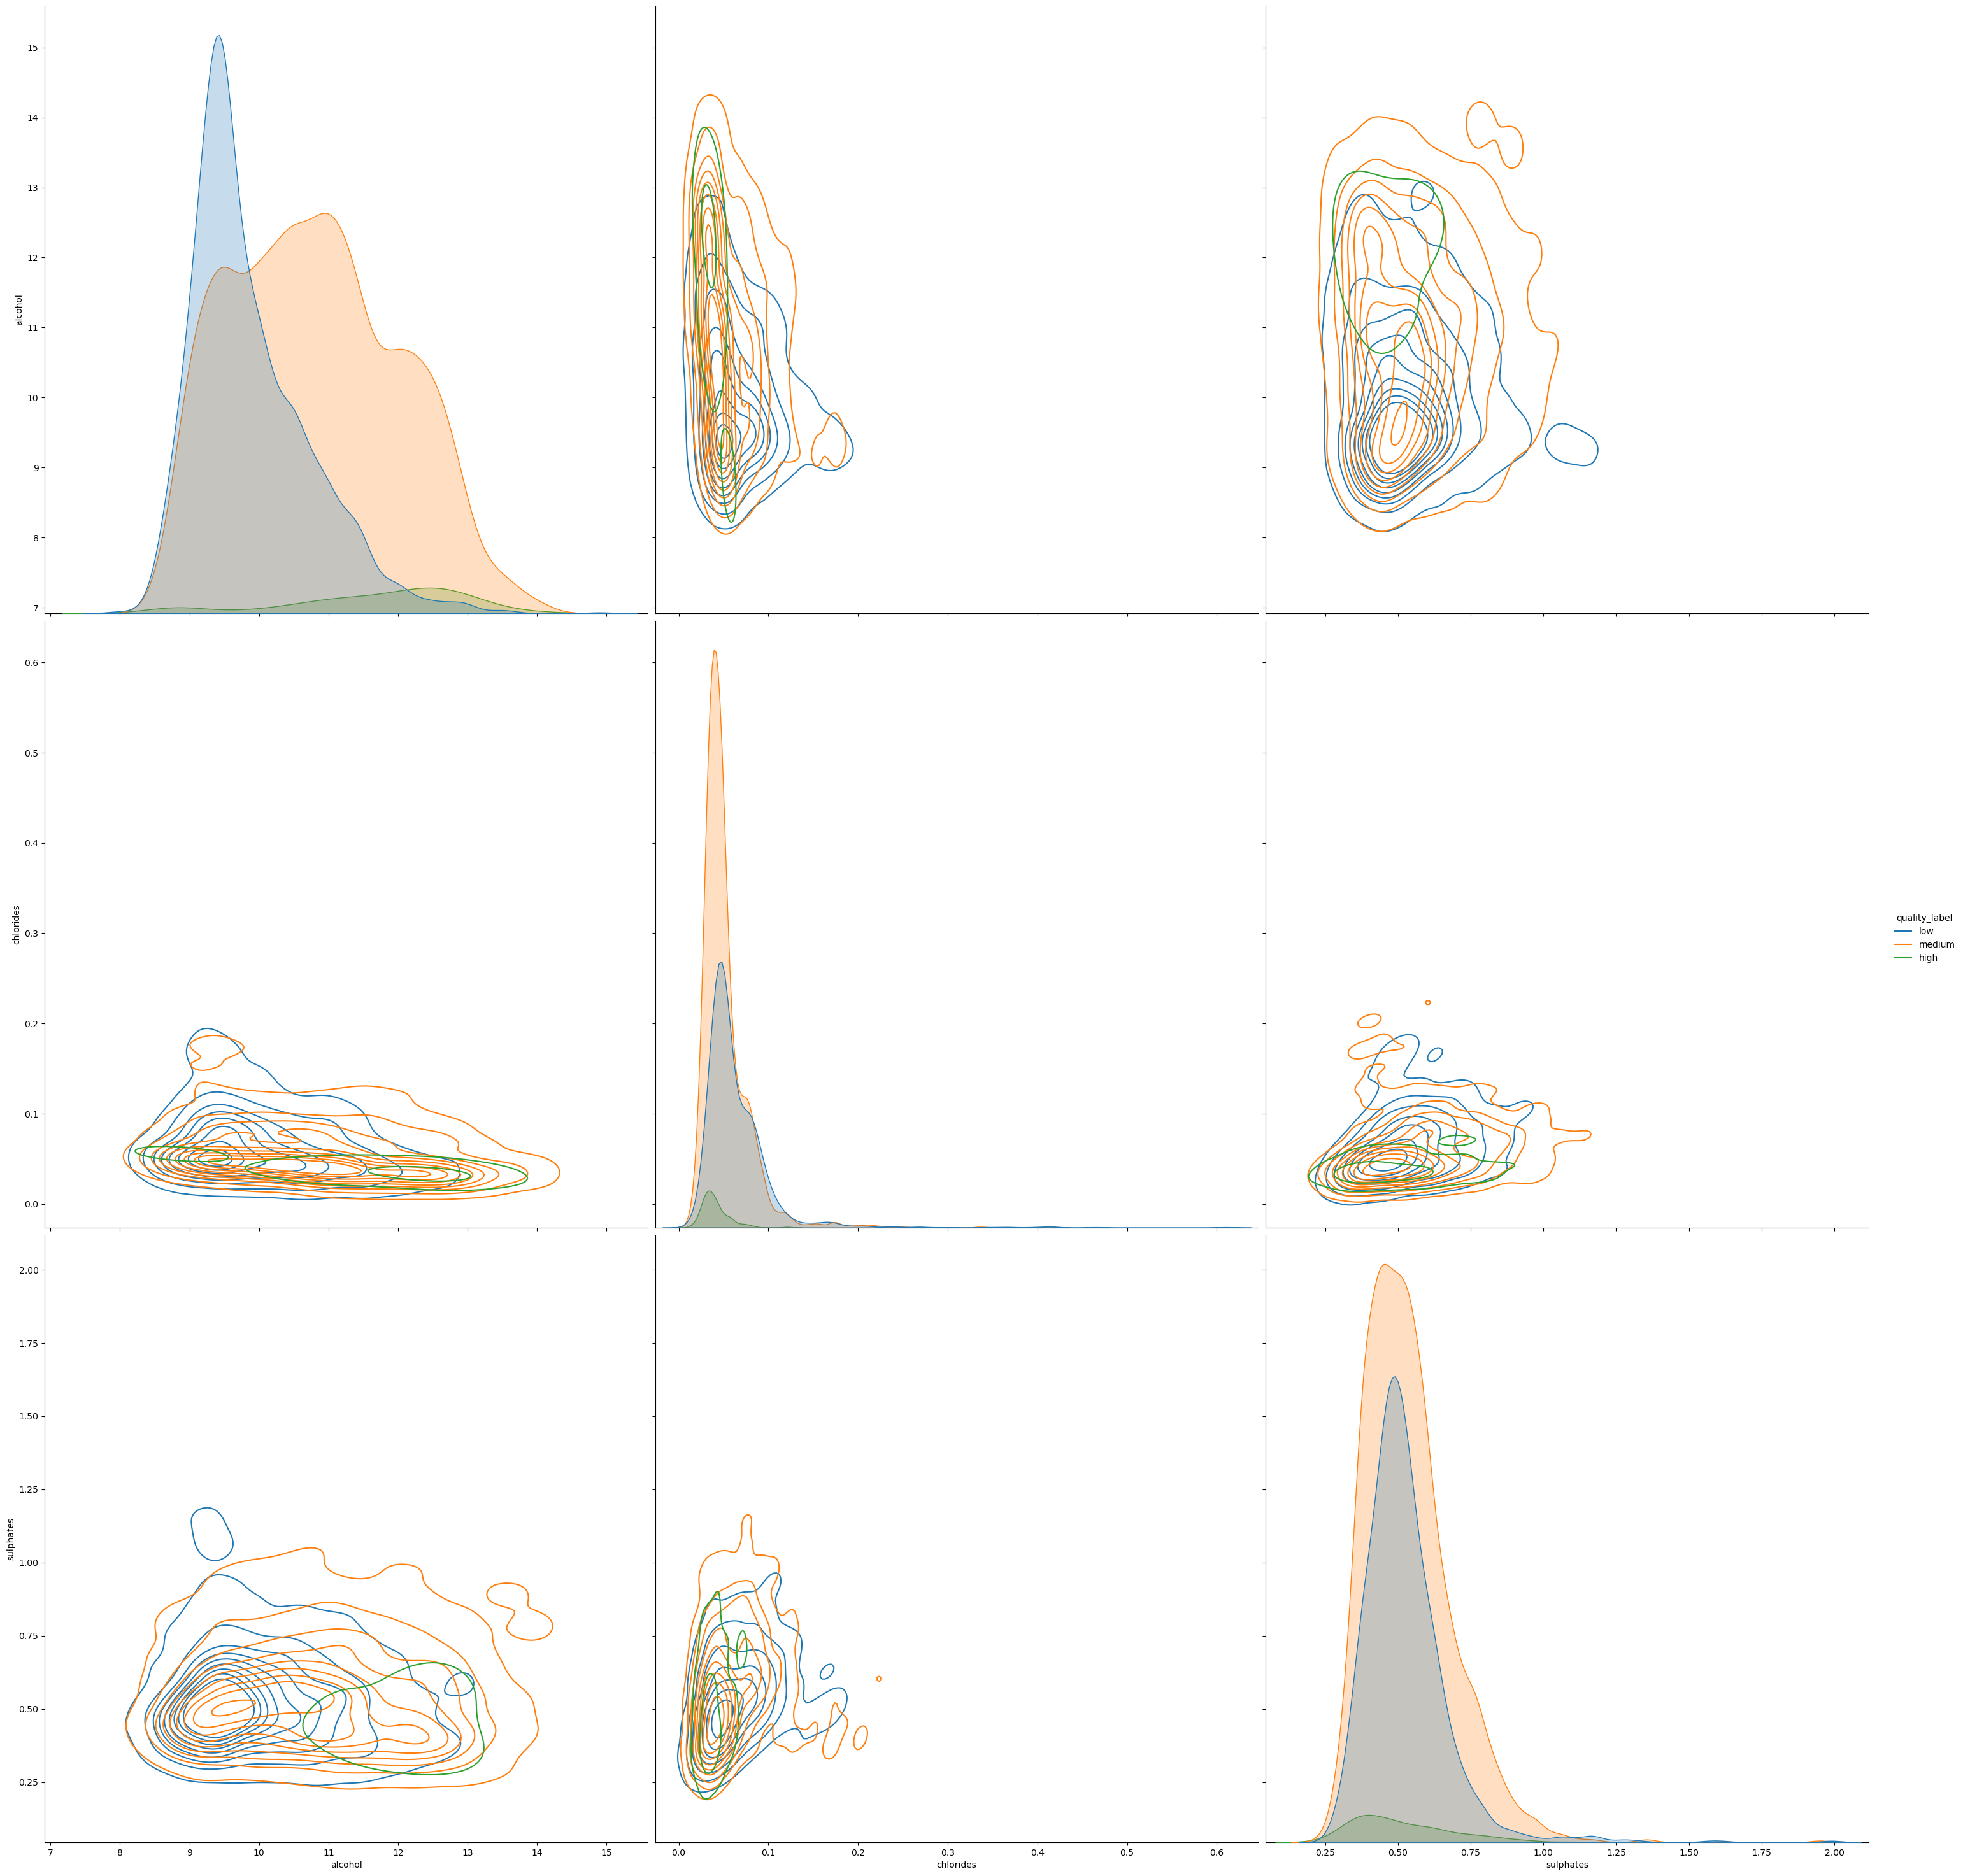

In [19]:
sns.pairplot(wines[['alcohol','chlorides','sulphates','quality_label']], hue='quality_label', kind="kde", size=10)
# ,plot_kws=dict(marker="+") #arg for plusses markers becasue dots are too big

## Note: this was confusing. I couldn't figure out how to get the hue data keys to load 
# but it turns out you just include them with the other columns and seaborn omits that graph automatically 
# if it's used for the hue coding

# https://seaborn.pydata.org/generated/seaborn.pairplot.html

### 3.3. Distribution of Alcohol % by Quality Label

Histogram, frequencies proportional to ocurrances per quality label

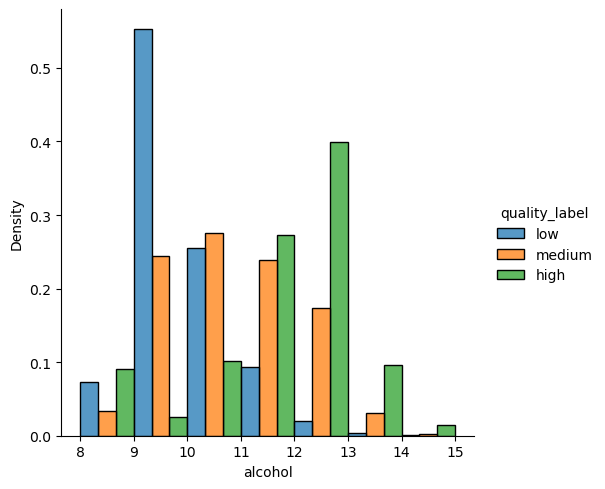

In [20]:
# would like to make a histogram divided by quality_label category with a common axis as the percent of category
#https://seaborn.pydata.org/tutorial/distributions.html#normalized-histogram-statistics

sns.displot(data=wines, x='alcohol', binwidth=1, hue='quality_label', stat="density", common_norm=False, multiple='dodge')


Kernel density estimation

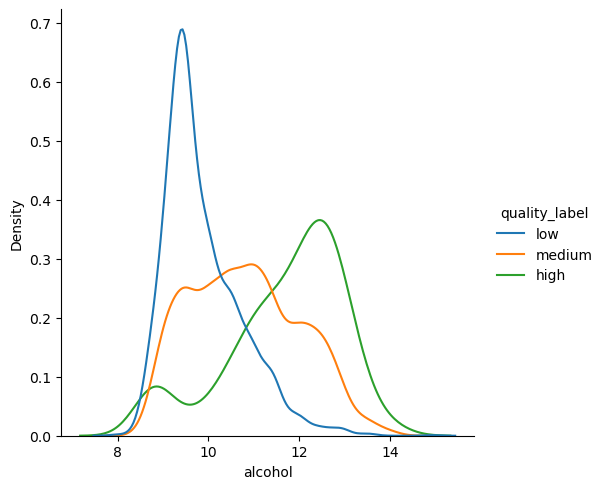

In [21]:
#KDE is similar to a histogram, but expressed as a smoothed probability density curve https://seaborn.pydata.org/generated/seaborn.kdeplot.html

sns.displot(data=wines, x='alcohol', hue='quality_label', kind="kde", common_norm=False)


# Exploratory Analysis 2

## Univariate Analysis

### Histograms

1. Use `pandas hist()` method. This uses the `matplotlib hist()` method on each series in the DataFrame, resulting in one histogram per column.

This helps us see the general distribution of each item before comparing any of them.

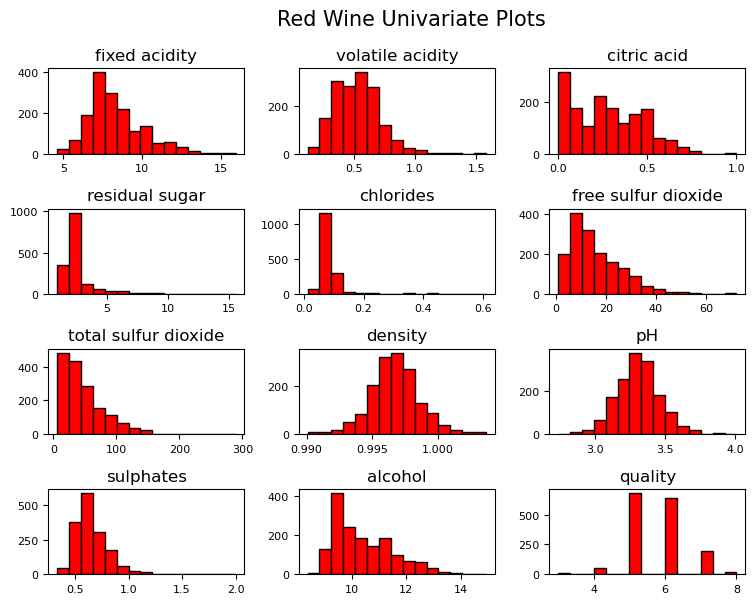

In [22]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

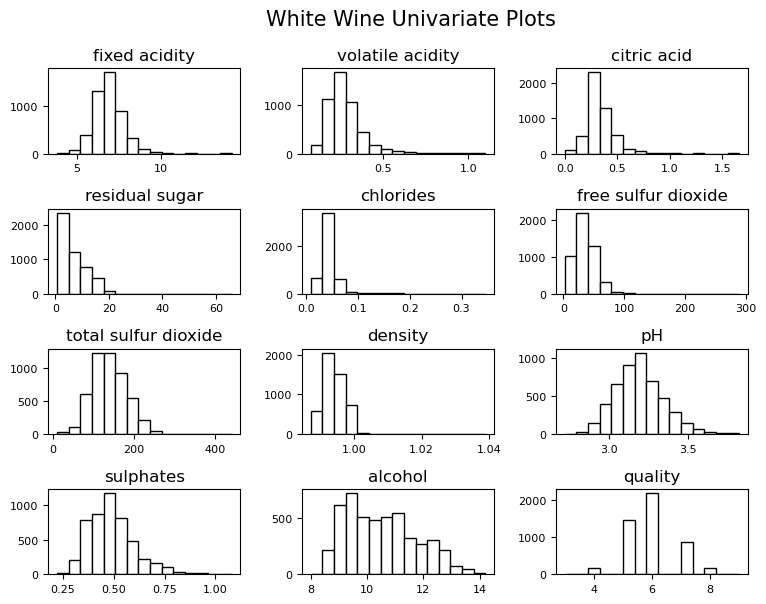

In [23]:
white_wine.hist(bins=15, color='white', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

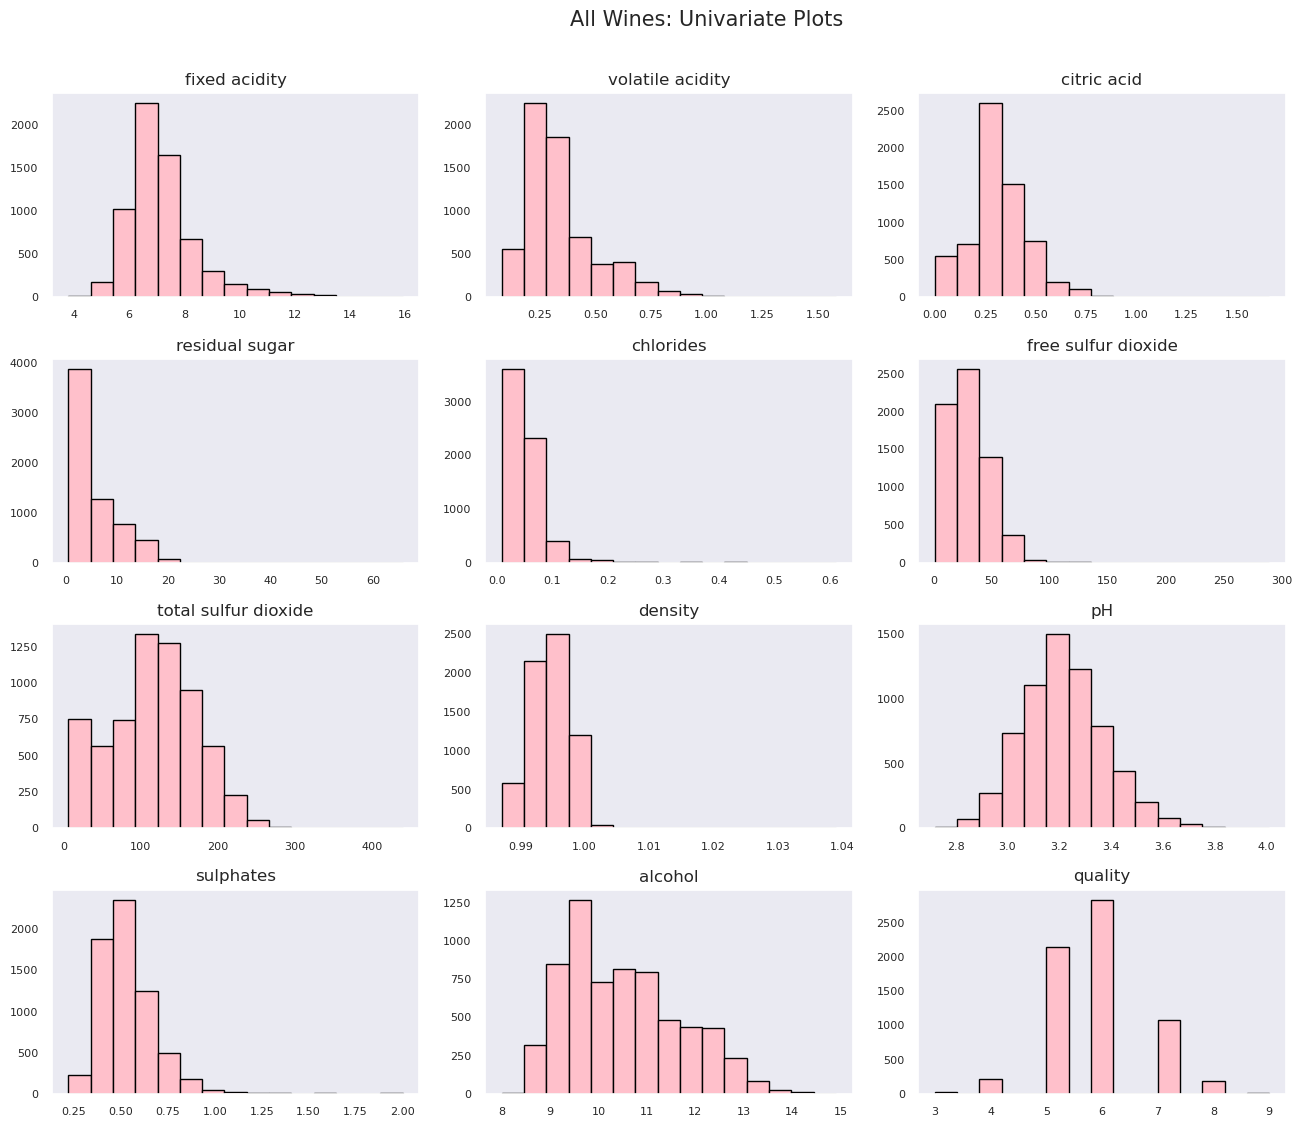

In [36]:
wines.hist(bins=15, color='pink', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('All Wines: Univariate Plots', x=0.65, y=1.25, fontsize=15)

2. Choose single features and analyse them across red and white wine. 
- Use seaborn.histplot
- Use matplotlib.axes to set title, labels and Y-axis limit

I have chosen to examine chlorides, density, sulphates as they appeared to be corellated with quality in the previous brief analysis.

2.1 Chlorides

Text(0.5, 1.0, 'Chlorides in Red and White Wines')

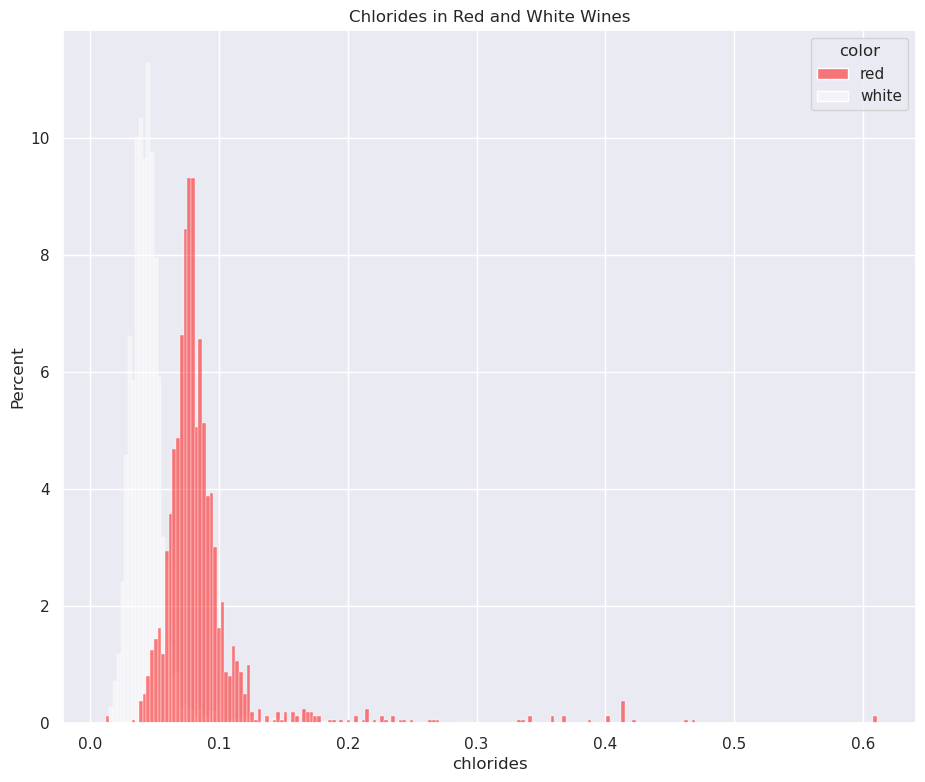

In [37]:
# use 'ax =' to initiate axes object in order to change params
# show relative (percentage) not absolute values for better comparison
#TODO: add units
#TODO: use a statistical measure to decide where to cut the X-axis
ax = sns.histplot(wines, x=wines.chlorides, palette=['red', 'white'], stat='percent', common_norm=False, hue=wines.color) 
ax.set_title('Chlorides in Red and White Wines')

2.2 Density

Text(0.5, 1.0, 'Density of Red and White Wines')

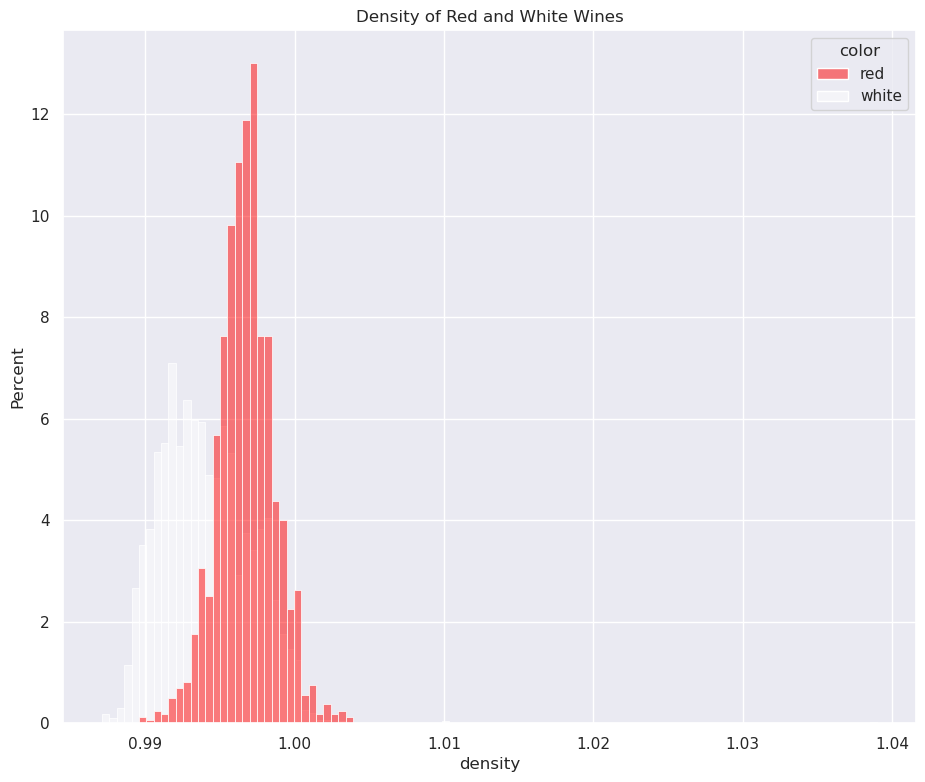

In [38]:
ax = sns.histplot(wines, x=wines.density, palette=['red', 'white'], stat='percent', common_norm=False, hue=wines.color) # use 'ax =' to initiate axes object in order to change params
ax.set_title('Density of Red and White Wines')

2.3 Sulphates

Text(0.5, 1.0, 'Sulphates in Red and White Wines')

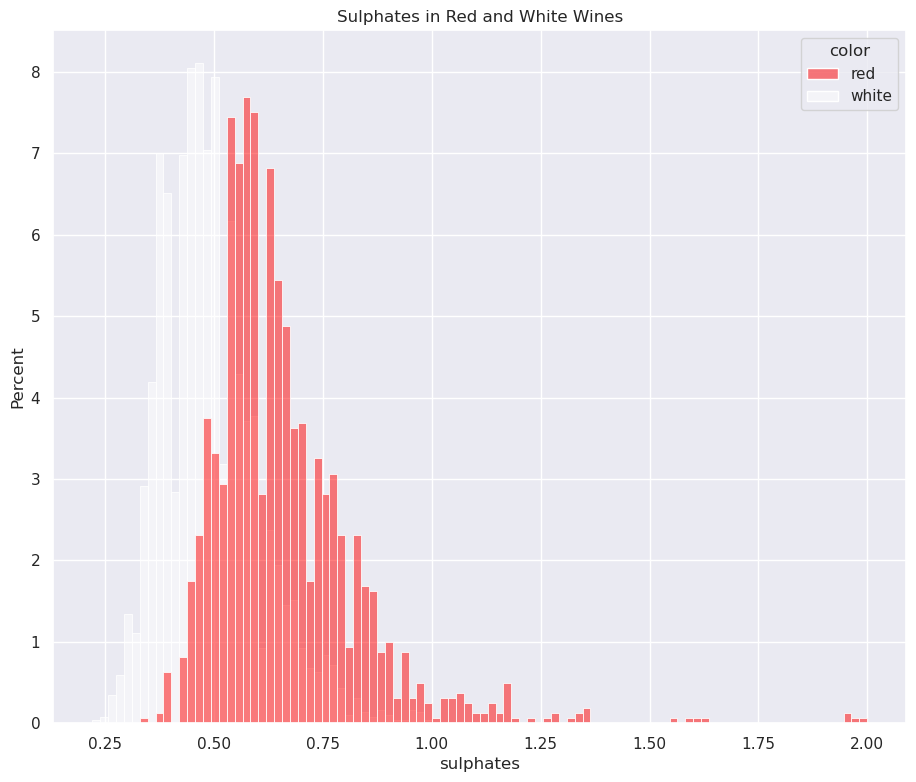

In [39]:
ax = sns.histplot(wines, x=wines.sulphates, palette=['red', 'white'], stat='percent', common_norm=False, hue=wines.color) # use 'ax =' to initiate axes object in order to change params
ax.set_title('Sulphates in Red and White Wines')

## Multivariate Analysis

### 1. Heatmap (Pairwise correlation plot)

The `pandas` `.corr()` method returns a grid of values between -1 and 1, where 0 indicates no correlation.
- The default correlation model used is the Pearson model, which gives what is commonly known as an r-value.

In [28]:
# Source: https://towardsdatascience.com/seaborn-heatmap-for-visualising-data-correlations-66cbef09c1fe

corr = wines.corr(numeric_only=True)
display(corr)

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   

                       alcohol   quality  
fixed acidity        -0.095452 -0.076743  
volatile acidity     -0.037640 -0.265699  
citric acid          -0.010493  0.085532  
residual sugar       -0.359415 -0.036980  
chlorides            -0.256916 -0.200666  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

We can feed this grid into `sns.heatmap` (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

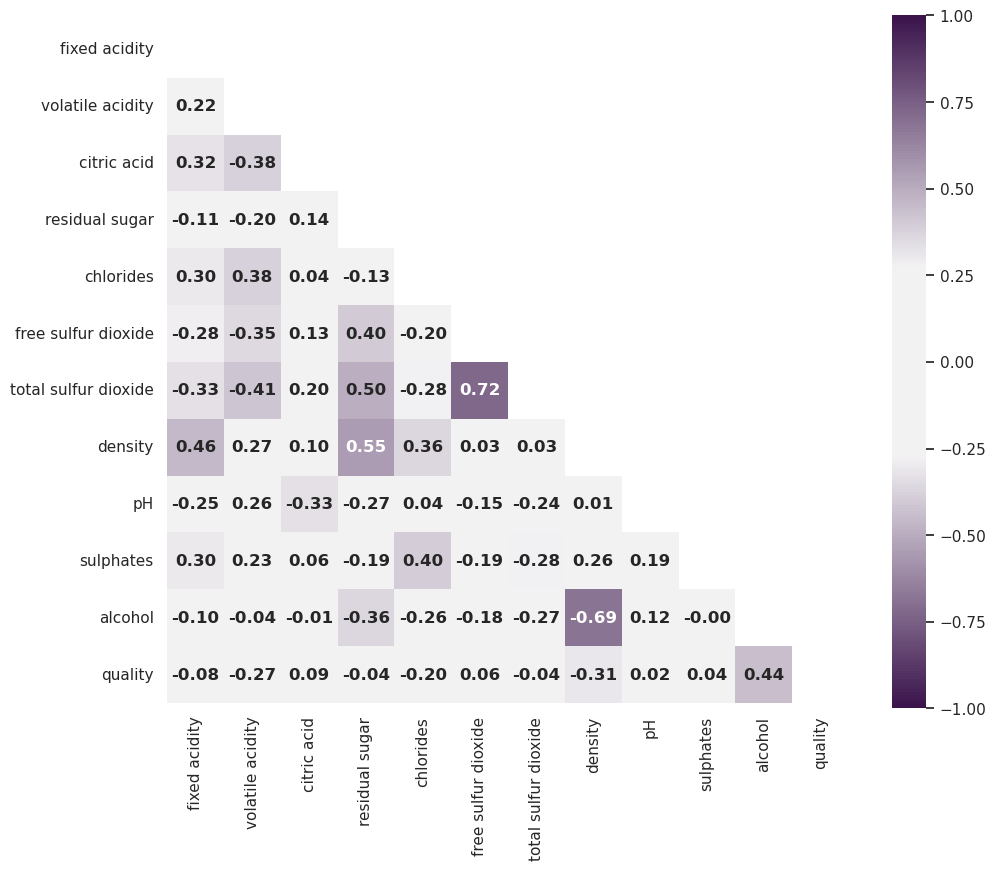

In [47]:
# I want my coloring to reflect on the strength of the correlation so I created a symmetrical diverging palette
# I set sep (size of intermediate region) to 70 [check if correct value] in order to highlight all values between 0.3 and -0.3 (often cutoff for significant corellation)
BlMonoCmap = sns.diverging_palette(h_neg=290, h_pos=290, sep=70, l=15, as_cmap=True)
#display(BlMonoCmap)

# mask for redundant data (source: https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap)
corrmask = np.triu(np.ones_like(corr, dtype=bool))

# create heatmap
sns.set_style(style='white')
sns.heatmap(corr, annot=True, fmt='.2f', mask=corrmask, cmap=BlMonoCmap, annot_kws={'fontweight':'bold'}, vmin=-1, vmax=1, square=True);
sns.set(rc={'figure.figsize':(11,9)}) # use `.set()` to expand figure size


### Joint plots (one scatterplot with two histograms)

`seaborn.jointplot()`: Draw a plot of two variables with bivariate and univariate graphs (https://seaborn.pydata.org/generated/seaborn.jointplot.html)


<function matplotlib.pyplot.show(close=None, block=None)>

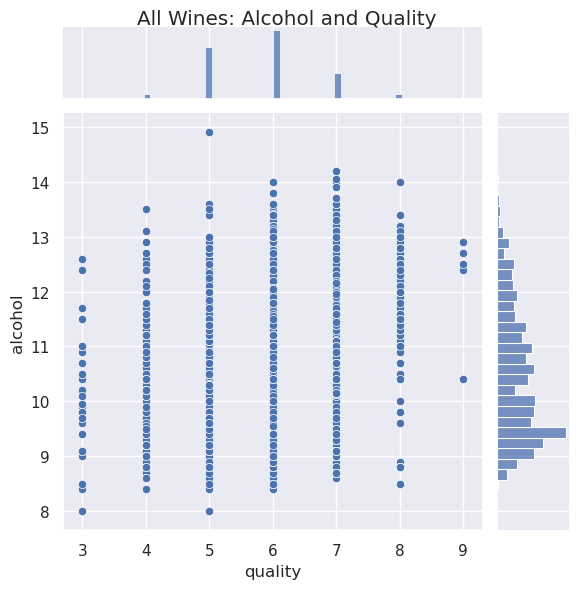

In [30]:
alc_jointplot = sns.jointplot(data=wines, x="quality", y="alcohol")

#plt.title('All Wines: Alcohol and Quality') ## failed. set_title() also failed.

alc_jointplot.fig.suptitle("All Wines: Alcohol and Quality")
alc_jointplot.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

plt.show


## Statistical significance

### One-way ANOVA test

ANOVA, or "analysis of variance", is a statistical model to analyse statistically significant differences between the means of various groups/categories.
- Uses variance (average of squared differences from the group's mean) to compare group means to each other and the whole dataset
- Returns F and p

Does mean alcohol level vary significantly among the low, medium and high quality red wines?
- Yes: p is below 0.05 and F is high

In [31]:
from scipy import stats

F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['alcohol'],
red_wine[red_wine['quality_label'] == 'medium']['alcohol'],
red_wine[red_wine['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 205.23448800361507 	p-value: 4.776936653588672e-80


Does mean alcohol level vary significantly among the low, medium and high quality red wines?
- Yes: p is below 0.05 and F is high, but not as high

In [32]:
F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['density'],
red_wine[red_wine['quality_label'] == 'medium']['density'],
red_wine[red_wine['quality_label'] == 'high']['density'])
print('ANOVA test for mean density across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean density across wine samples with different quality ratings
F Statistic: 31.045920436543238 	p-value: 4.4121707800208986e-14


TypeError: boxplot() got an unexpected keyword argument 'y_cutoff'

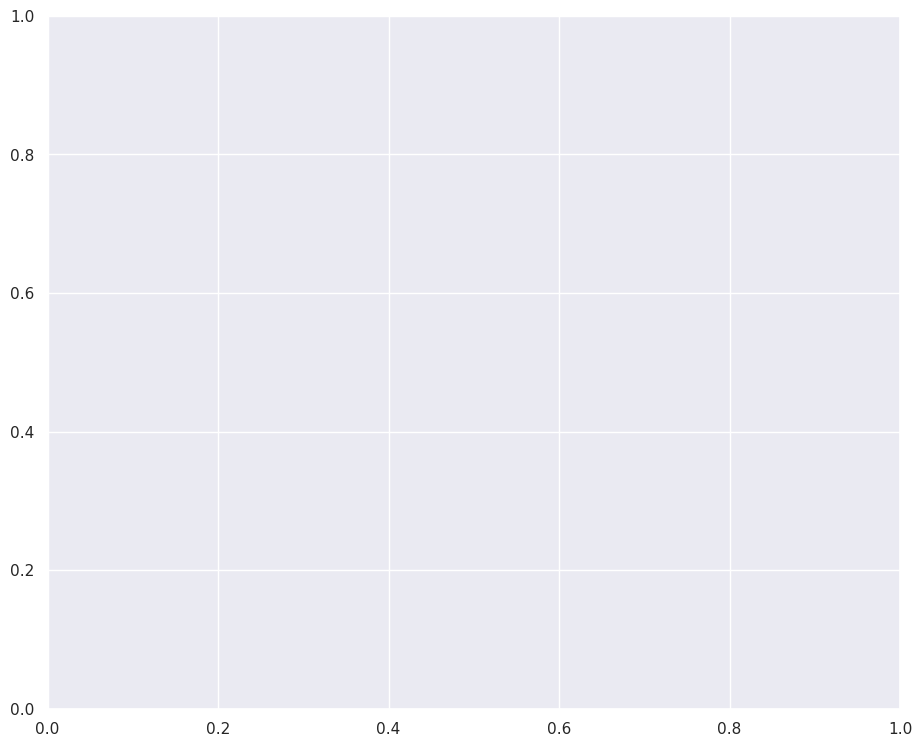

In [33]:
sns.boxplot(y=wines['density'], x=wines['quality_label'], y_cutoff=1)